In [2]:
import pandas as pd

aligned_result_r5 = pd.read_csv('./round05_election_result_aligned.csv')
aligned_result_r5_df = pd.DataFrame(aligned_result_r5, columns=['광역시도', 'hannara_rate', 'minju_rate', 'gita_rate'])
aligned_result_r6 = pd.read_csv('./round06_election_result_aligned.csv')
aligned_result_r6_df = pd.DataFrame(aligned_result_r6, columns=['광역시도', 'minju_rate', 'saenuri_rate', 'gita_rate'])
aligned_result_r7 = pd.read_csv('./round07_election_result_aligned.csv')
aligned_result_r7_df = pd.DataFrame(aligned_result_r7, columns=['광역시도', 'minju_rate', 'hanguk_rate', 'gita_rate'])

# print(aligned_result_r5_df, '\n')
# print(aligned_result_r6_df, '\n')
# print(aligned_result_r7_df)

In [3]:
rnd_list = ['r5', 'r6', 'r7']
party_list = ['jinbo_1dang', 'bosu_1dang', 'gita_dang']
province_list = ['Gangwon', 'Gyeonggi', 'Gyeongnam', 'Gyeongbuk', 'Gwangju', 'Daegu',
           'Daejeon', 'Busan', 'Seoul', 'Sejong', 'Ulsan', 'Incheon', 'Jeonnam', 
            'Jeonbuk', 'Jeju', 'Chungnam', 'Chungbuk']

province_old_list = province_list.copy()
province_old_list.remove('Sejong')

final_row_list = []
for i in rnd_list:
    for j in party_list:
        if(i == 'r5'):
            p_list = province_old_list
        else:
            p_list = province_list
        
        for k in p_list:
            final_row_list.append(i + '_' + j + '_' + k)
     
arr_r5 = aligned_result_r5_df.values.copy()
arr_r5.resize(16*4, 1)
arr_r5_list = [arr_r5[i] for i in range(16*4) if i%4 != 0]
arr_r5_list_df = pd.DataFrame(arr_r5_list)

arr_r6 = aligned_result_r6_df.values.copy()
arr_r6.resize(17*4, 1)
arr_r6_list = [arr_r6[i] for i in range(17*4) if i%4 != 0]
arr_r6_list_df = pd.DataFrame(arr_r6_list)

arr_r7 = aligned_result_r7_df.values.copy()
arr_r7.resize(17*4, 1)
arr_r7_list = [arr_r7[i] for i in range(17*4) if i%4 != 0]
arr_r7_list_df = pd.DataFrame(arr_r7_list)

final_row_value_df = pd.concat([arr_r5_list_df, arr_r6_list_df, arr_r7_list_df])
final_row_value_df.index = final_row_list
final_row_value_df.columns = ['rate']
final_row_value_df

rate
r5_jinbo_1dang_Gangwon    0.439666
r5_jinbo_1dang_Gyeonggi   0.523703
r5_jinbo_1dang_Gyeongnam  0.036631
r5_jinbo_1dang_Gyeongbuk  0.500906
r5_jinbo_1dang_Gwangju    0.458654
...                            ...
r7_gita_dang_Jeonnam      0.341666
r7_gita_dang_Jeonbuk      0.049434
r7_gita_dang_Jeju         0.599182
r7_gita_dang_Chungnam     0.290638
r7_gita_dang_Chungbuk     0.110179

[150 rows x 1 columns]

In [4]:
import sys
import numpy as np

def KL(P,Q):
    epsilon = 1e-10

    # You may want to instead make copies to avoid changing the np arrays.
    if P == 0:
        P = P+epsilon
    if Q == 0:
        Q = Q+epsilon

#     divergence = np.sum(P*np.log(P/Q))
    divergence = P*np.log(P/Q)
    return divergence

def SKL(P,Q):
    epsilon = 1e-10

    # You may want to instead make copies to avoid changing the np arrays.
    if P == 0:
        P = P+epsilon
    if Q == 0:
        Q = Q+epsilon

#     divergence = np.sum(P*np.log(P/Q))
    divergence = 0.5*(P*np.log(P/Q) + Q*np.log(Q/P))
    return divergence

def CE(P,Q):
    epsilon = 1e-10

    # You may want to instead make copies to avoid changing the np arrays.
#     if P == 0:
    P = P+epsilon
#     if Q == 0:
    Q = Q+epsilon

    ce = -P*np.log(Q)
    return ce

data_list = final_row_value_df.rate.to_list()
# print(len(data_list))
KL_result = []
CE_result = []
SKL_result = []
for a in data_list:
    for b in data_list:
        KL_result.append(KL(a, b))
        CE_result.append(CE(a, b))
        SKL_result.append(SKL(a, b))

# print(KL_result)
KL_result_reshaped = np.reshape(KL_result, (150,150))
CE_result_reshaped = np.reshape(CE_result, (150,150))
SKL_result_reshaped = np.reshape(SKL_result, (150,150))

KL_result_df = pd.DataFrame(KL_result_reshaped)
KL_result_df.index = final_row_list
KL_result_df.columns = final_row_list
# KL_result_df

CE_result_df = pd.DataFrame(CE_result_reshaped)
CE_result_df.index = final_row_list
CE_result_df.columns = final_row_list

SKL_result_df = pd.DataFrame(SKL_result_reshaped)
SKL_result_df.index = final_row_list
SKL_result_df.columns = final_row_list


# CE_result_df
# KL_result_df
SKL_result_df

r5_jinbo_1dang_Gangwon  r5_jinbo_1dang_Gyeonggi  \
r5_jinbo_1dang_Gangwon                  0.000000                 0.007349   
r5_jinbo_1dang_Gyeonggi                 0.007349                 0.000000   
r5_jinbo_1dang_Gyeongnam                0.500797                 0.647814   
r5_jinbo_1dang_Gyeongbuk                0.003993                 0.000507   
r5_jinbo_1dang_Gwangju                  0.000401                 0.004314   
...                                          ...                      ...   
r7_gita_dang_Jeonnam                    0.012357                 0.038873   
r7_gita_dang_Jeonbuk                    0.426402                 0.559704   
r7_gita_dang_Jeju                       0.024689                 0.005081   
r7_gita_dang_Chungnam                   0.030844                 0.068619   
r7_gita_dang_Chungbuk                   0.227990                 0.322304   

                          r5_jinbo_1dang_Gyeongnam  r5_jinbo_1dang_Gyeongbuk  \
r5_jinbo_1dang_Gangwon                    0.500797                  0.003993   
r5_jinbo_1dang_Gyeonggi                   0.647814                  0.000507   
r5_jinbo_1dang_Gyeongnam                  0.000000                  0.607161   
r5_jinbo_1dang_Gyeongbuk                  0.607161                  0.000000   
r5_jinbo_1dang_Gwangju                    0.533312                  0.001862   
...                                            ...                       ...   
r7_gita_dang_Jeonnam                      0.340563                  0.030461   
r7_gita_dang_Jeonbuk                      0.001919                  0.522753   
r7_gita_dang_Jeju                         0.786074                  0.008803   
r7_gita_dang_Chungnam                     0.263049                  0.057228   
r7_gita_dang_Chungbuk                     0.040496                  0.295840   

                          r5_jinbo_1dang_Gwangju  r5_jinbo_1dang_Daegu  \
r5_jinbo_1dang_Gangwon                  0.000401              0.476315   
r5_jinbo_1dang_Gyeonggi                 0.004314              0.618842   
r5_jinbo_1dang_Gyeongnam                0.533312              0.000188   
r5_jinbo_1dang_Gyeongbuk                0.001862              0.579402   
r5_jinbo_1dang_Gwangju                  0.000000              0.507811   
...                                          ...                   ...   
r7_gita_dang_Jeonnam                    0.017224              0.321409   
r7_gita_dang_Jeonbuk                    0.455801              0.000903   
r7_gita_dang_Jeju                       0.018779              0.753112   
r7_gita_dang_Chungnam                   0.038326              0.246727   
r7_gita_dang_Chungbuk                   0.248495              0.034949   

                          r5_jinbo_1dang_Daejeon  r5_jinbo_1dang_Busan  \
r5_jinbo_1dang_Gangwon                  0.000282              4.881199   
r5_jinbo_1dang_Gyeonggi                 0.004749              5.859979   
r5_jinbo_1dang_Gyeongnam                0.527994              0.361162   
r5_jinbo_1dang_Gyeongbuk                0.002151              5.593741   
r5_jinbo_1dang_Gwangju                  0.000010              5.101701   
...                                          ...                   ...   
r7_gita_dang_Jeonnam                    0.016385              3.750113   
r7_gita_dang_Jeonbuk                    0.450989              0.494804   
r7_gita_dang_Jeju                       0.019677              6.744895   
r7_gita_dang_Chungnam                   0.037064              3.166530   
r7_gita_dang_Chungbuk                   0.245126              1.146977   

                          r5_jinbo_1dang_Seoul  r5_jinbo_1dang_Ulsan  ...  \
r5_jinbo_1dang_Gangwon                0.011196              0.071314  ...   
r5_jinbo_1dang_Gyeonggi               0.000402              0.032708  ...   
r5_jinbo_1dang_Gyeongnam              0.685244              1.027306  ...   
r5_jinbo_1dang_Gyeongbuk              0.001814        

In [5]:
# # KL_result_df.to_csv('./KL_result_df.csv', encoding='utf-8',  sep=',')
# CE_result_df.to_csv('./CE_result_df.csv', encoding='utf-8',  sep=',')
# SKL_result_df.to_csv('./SKL_result_df.csv', encoding='utf-8',  sep=',')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(300,300))
sns.heatmap(SKL_result_df, annot=True)
plt.show()

(150, 150)
(150,)
(150, 150)


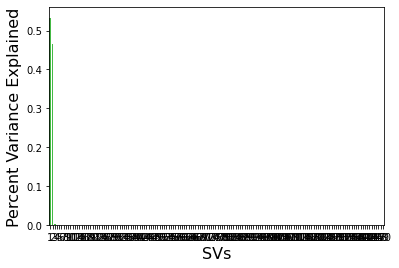

In [11]:
u, s, v = np.linalg.svd(SKL_result_df, full_matrices=True)
print(u.shape)
print(s.shape)
print(v.shape)

var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained
 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=1000)

In [30]:
# print(u, '\n')
# print(np.diag(s, 1)[:, 1:], '\n')
# print(v, '\n','\n')

S = np.zeros(SKL_result_df.shape)
for i in range(len(s)):
    S[i][i] = s[i]

S0 = np.zeros(SKL_result_df.shape)
S0[0][0] = s[0]
# print(S0)

In [33]:
appA = np.dot(u, np.dot(S, v))
appA0 = np.dot(u, np.dot(S0, v))
# print(SKL_result_df - appA)
# print(SKL_result_df - appA0)


# print(np.dot(u),np.dot(S0,v))

                          r5_jinbo_1dang_Gangwon  r5_jinbo_1dang_Gyeonggi  \
r5_jinbo_1dang_Gangwon                 -0.452151                -0.537006   
r5_jinbo_1dang_Gyeonggi                -0.537006                -0.655362   
r5_jinbo_1dang_Gyeongnam                0.206479                 0.293478   
r5_jinbo_1dang_Gyeongbuk               -0.514598                -0.623836   
r5_jinbo_1dang_Gwangju                 -0.471890                -0.564289   
...                                          ...                      ...   
r7_gita_dang_Jeonnam                   -0.343737                -0.389837   
r7_gita_dang_Jeonbuk                    0.157159                 0.235557   
r7_gita_dang_Jeju                      -0.608418                -0.757130   
r7_gita_dang_Chungnam                  -0.281778                -0.307753   
r7_gita_dang_Chungbuk                  -0.000949                 0.046679   

                          r5_jinbo_1dang_Gyeongnam  r5_jinbo_1dang_Gyeongbu